In [37]:
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
data = pd.read_csv(r"C:\Users\user\Desktop\MSC(Data Science)\Principle of Data Science\Salary_Data.csv")
data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes


In [40]:
### Divide the data into features and targets
#x = data['YearsExperience'].values
x = data.iloc[:,0].values
y = data.iloc[:,1].values

In [41]:
### Shape of feature should be (no.of samples,no.of features)
### Shape of target should be (no.of samples,no.of target) or (no.of samples,)

In [42]:
print(x.shape)
print(y.shape)

(30,)
(30,)


In [43]:
x = x.reshape((30,1))
x.shape

(30, 1)

In [44]:
### Split the data into training and testing samples
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.80,random_state=0)

In [45]:
xtrain

array([[ 9.6],
       [ 4. ],
       [ 5.3],
       [ 7.9],
       [ 2.9],
       [ 5.1],
       [ 3.2],
       [ 4.5],
       [ 8.2],
       [ 6.8],
       [ 1.3],
       [10.5],
       [ 3. ],
       [ 2.2],
       [ 5.9],
       [ 6. ],
       [ 3.7],
       [ 3.2],
       [ 9. ],
       [ 2. ],
       [ 1.1],
       [ 7.1],
       [ 4.9],
       [ 4. ]])

In [46]:
xtest

array([[ 1.5],
       [10.3],
       [ 4.1],
       [ 3.9],
       [ 9.5],
       [ 8.7]])

In [47]:
#### Build the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [48]:
## Training the model
model.fit(xtrain,ytrain)

LinearRegression()

In [49]:
### Prediction
ypred = model.predict(xtest)
ypred

array([ 40748.96184072, 122699.62295594,  64961.65717022,  63099.14214487,
       115249.56285456, 107799.50275317])

In [50]:
ytest

array([ 37731, 122391,  57081,  63218, 116969, 109431], dtype=int64)

In [51]:
xtest

array([[ 1.5],
       [10.3],
       [ 4.1],
       [ 3.9],
       [ 9.5],
       [ 8.7]])

In [52]:
from sklearn.metrics import r2_score
score = r2_score(ytest,ypred)
score*100

98.8169515729126

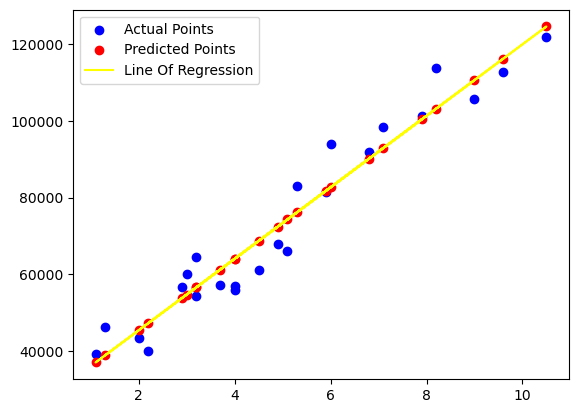

In [53]:
### Draw the line of regression (Training samples)
plt.scatter(xtrain,ytrain,color='blue',label="Actual Points")
plt.scatter(xtrain,model.predict(xtrain),color='red',label="Predicted Points")
plt.plot(xtrain,model.predict(xtrain),color='yellow',label="Line Of Regression")
plt.legend()
plt.show()

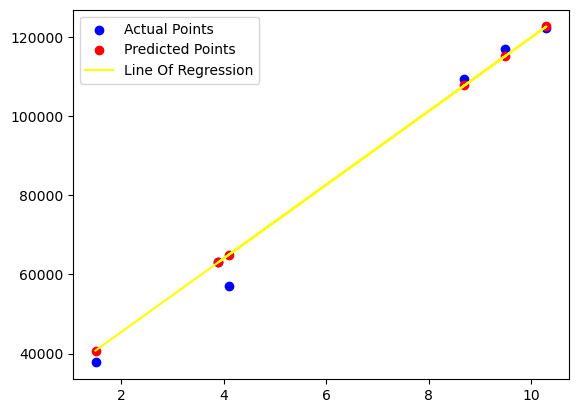

In [54]:
### Draw the line of regression (Testing samples)
plt.scatter(xtest,ytest,color='blue',label="Actual Points")
plt.scatter(xtest,ypred,color='red',label="Predicted Points")
plt.plot(xtest,ypred,color='yellow',label="Line Of Regression")
plt.legend()
plt.show()

In [55]:
accuracy = []
for i in range(501):
  xtrain1,xtest1,ytrain1,ytest1 = train_test_split(x,y,train_size=0.80,random_state=i)
  model1 = LinearRegression()
  model1.fit(xtrain1,ytrain1)
  ypred1 = model1.predict(xtest1)
  score1 = r2_score(ytest1,ypred1)
  accuracy.append(score1)

In [56]:
accuracy

[0.988169515729126,
 0.7616681465472094,
 0.8886956733784562,
 0.9695039421049821,
 0.9504404484884268,
 0.9439628569611375,
 0.9368146227107088,
 0.8143022783109007,
 0.9631182154839476,
 0.9388416537799072,
 0.9816423482070253,
 0.940882728477622,
 0.9429269163491424,
 0.9394460269118793,
 0.9606215790278543,
 0.8697012433817218,
 0.7949890249259295,
 0.9384744808306155,
 0.8864330645841889,
 0.9415531751862448,
 0.9441299149555877,
 0.9398582853702571,
 0.8870702615446784,
 0.9184170849214232,
 0.9520702017424296,
 0.9531732818427658,
 0.9835849730044816,
 0.9636425773684422,
 0.9217841352107623,
 0.9467172742609804,
 0.9944092048209745,
 0.8967649524853983,
 0.8985995727228404,
 0.9350785573211586,
 0.9244141448042442,
 0.8839476512584652,
 0.955021106900739,
 0.9778242092591887,
 0.972479448737762,
 0.9928344802911049,
 0.7775083459037235,
 0.9802519469633169,
 0.9024461774180497,
 0.8688045158887867,
 0.934951117043928,
 0.9250487875802144,
 0.9789129767378081,
 0.98399193890564,

In [57]:
import numpy as np
np.max(accuracy)

0.9952429110093546

In [58]:
np.argmax(accuracy)

200

In [59]:
model.predict([[15]])

array([166468.72605157])

In [60]:
model.predict([[15]])[0]

166468.72605156602

In [61]:
round(model.predict([[15]])[0],2)

166468.73

In [62]:
import joblib
joblib.dump(model,"salary.pkl")

['salary.pkl']

In [63]:
mymodel = joblib.load("salary.pkl")

In [64]:
round(mymodel.predict([[15]])[0],2)

166468.73

In [65]:
### Value of m
model.coef_

array([9312.57512673])

In [66]:
model.intercept_

26780.099150628186